# Homework 1

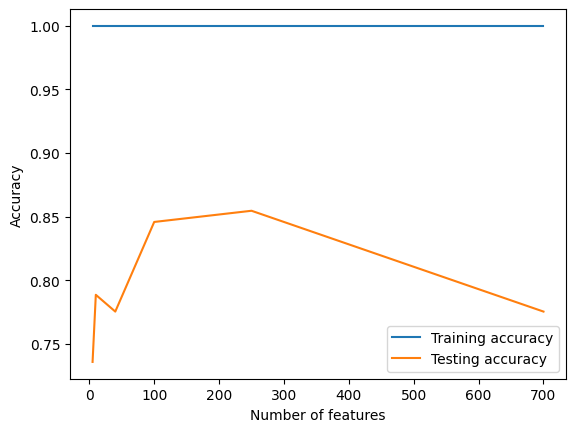

In [2]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

### Load input
data = loadarff('../data/pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

### Training-testing split
X = df.loc[:, df.columns != 'class']
y = df.loc[:, 'class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Feature selection
igs = {}
for variable in X_train:
    igs[variable] = round(mutual_info_classif(X_train[variable].values.reshape(-1, 1), y_train)[0], 4)
sorted_igs = sorted(igs, key=igs.get, reverse=True)

### Decision tree learning
n_features = [5, 10, 40, 100, 250, 700]
train_accuracy = []
test_accuracy = []

for i in range(6):
    n = n_features[i]

    clf = DecisionTreeClassifier()
    clf.fit(X_train[sorted_igs[:n]], y_train)

    y_train_pred = clf.predict(X_train[sorted_igs[:n]])
    y_test_pred = clf.predict(X_test[sorted_igs[:n]])

    train_accuracy += [round(accuracy_score(y_train, y_train_pred), 4)]
    test_accuracy += [round(accuracy_score(y_test, y_test_pred), 4)]

### Plot
plt.plot(n_features, train_accuracy, label="Training accuracy")
plt.plot(n_features, test_accuracy, label="Testing accuracy")
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()